<a href="https://colab.research.google.com/github/VincentGariepy/IFT6390-Competition2-BeaudelAIre/blob/main/Naive_Bayes/Comp%C3%A9tition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Compétition 2
Anshita Saxena, Denis Lemarchand, Vincent Gariépy

#Code

In [1]:
import numpy as np
import pandas as pd

##Upload Kaggle File from Google Drive

In [2]:
#@title Install PyDrive
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#This notebook should access to Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# train data
# https://drive.google.com/file/d/17cD6hFS_AfKxtfjKxfeNUkC44jfSYkGj/view?usp=sharing
# train result
# https://drive.google.com/file/d/1iEpwQ3B4d4gIUl3ynq_p74U1QKZTURem/view?usp=sharing
# test data
# https://drive.google.com/file/d/1QbhqakgLpBXWr5sMFSe-BQpFw_X2XZZR/view?usp=sharing

#download Kaggle Files from Google Drive to store it in Colab Session
downloaded = drive.CreateFile({'id':"17cD6hFS_AfKxtfjKxfeNUkC44jfSYkGj"})   
downloaded.GetContentFile('train.csv') 

downloaded = drive.CreateFile({'id':"1iEpwQ3B4d4gIUl3ynq_p74U1QKZTURem"})   
downloaded.GetContentFile('train_result.csv')    

downloaded = drive.CreateFile({'id':"1QbhqakgLpBXWr5sMFSe-BQpFw_X2XZZR"})   
downloaded.GetContentFile('test.csv')     

In [5]:
#
df_train = pd.read_csv('train.csv')
#
df_train_result = pd.read_csv('train_result.csv')
#
df_test = pd.read_csv('test.csv')

##Generate submission file

In [6]:
#make submission file from numpy data
#The value of class should be 0, 1 or 2 with 0 being negative, 1 being neutral and 2 being positive class.
def PrepareKaggleFile(test_inputs, test_predictions, file='tests_label.csv'):
    output_data_for_kaggle = np.zeros((len(test_inputs),2))
    for i in range(len(test_inputs)):
      output_data_for_kaggle[i,0] = i
      output_data_for_kaggle[i,1] = test_predictions[i]

    output_data_for_kaggle = output_data_for_kaggle.astype(int)

    print(output_data_for_kaggle)

    df = pd.DataFrame(data=output_data_for_kaggle,columns=['id','target'])
    df.to_csv(file,index=False)

##Preprocessing

References:
*   Data preprocessing techniques: https://www.mdpi.com/2078-2489/12/9/374/htm




In [7]:
remove_neutral_mode = True
preprocessing_cleanning_mode = True

#lowercase_mode = False #0.7775705785664164
lowercase_mode = True #0.7799928868724347 --> baseline

remove_video_mode = False #True: 0.7799928868724347 --> no impact
remove_html_mode = False #True: 0.7796852921669086 --> no improvement
clean_stop_word_mode = False #True: 0.7701402439610509 --> no improvement
remove_punctuation_mode = False #True: 0.7800890102179117 --> no improvement
remove_hashmarks_mode = False #True: 0.7795891688214317 --> no improvement
remove_number_mode = False #True: 0.7797718031778378 --> no improvement
remove_username_mode = False #True: 0.7789643670758317 --> no improvement
remove_url_mode = False #True: 0.7824055828439053 --> no improvement
stemming_mode = False #True: 0.775244393605875 --> no improvement

In [8]:
# Data preprocessing dependencies
import nltk 
nltk.download('stopwords')

import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Conversion from categorical labels to numeric labels
df_train_result[df_train_result["target"]=='negative']=0
df_train_result[df_train_result["target"]=='neutral']=1
df_train_result[df_train_result["target"]=='positive']=2

In [10]:
# Checking the train content
df_train.head()

,id,text
0,0,Anyway Im getting of for a while
1,1,"My red, Apache isn't feelin too well this morn..."
2,2,@danyelljoy you should be its great. friday w...
3,3,its 11:30pm and i dont wanna sleep; so i debat...
4,4,Why does twitter eat my DM's? Not happy


In [11]:
# Check the target content
df_train_result.head()

,id,target
0,2,2
1,0,0
2,2,2
3,2,2
4,0,0


In [12]:
# Remove punctuation and numbers
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

"""
Snowball Stemmer is also known as the Porter2 stemming algorithm 
because it is a better version of the Porter Stemmer. It is more aggressive than Porter Stemmer.
"""
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
def stemming(text):
    text = [snowBallStemmer.stem(word) for word in text.split()]
    return ' '.join(text)

def Preprocessing_Cleanning(df_data):
      # Converting all the upper case to lower case to avoid the distinction between them
      if lowercase_mode==True:
        df_data['text'] = df_data.text.str.lower()

      # Putting the regex for removing the https and www URLs
      if remove_url_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
        df_data.text = df_data.text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

      # Remove the video and links
      if remove_video_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r'{link}', '', x))
        df_data.text = df_data.text.apply(lambda x: re.sub(r"\[video\]", '', x))

      # Remove html reference characters
      if remove_html_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

      # Remove usernames
      if remove_username_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r'@[^\s]+', '', x))

      # Removing numbers
      if remove_number_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r'\d+', '', x))

      # Removing hashmarks, non-letter characters
      if remove_hashmarks_mode==True:
        df_data.text = df_data.text.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

      # Remove punctuation
      if remove_punctuation_mode==True:
        df_data['text'] = df_data['text'].apply(lambda x: remove_punct(x))

      # Remove stop words
      if clean_stop_word_mode==True:
          stopword_list = stopwords.words('english')
          df_data['text'] = df_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword_list)]))

      # stemming
      if stemming_mode==True:
          df_data['text'] = df_data['text'].apply(lambda x: stemming(x))

      return df_data


In [13]:
# Creating a copy of dataset to point them to the different locations in the memory.
df_train_clean = df_train.copy()

if preprocessing_cleanning_mode==True:
    df_train_clean = Preprocessing_Cleanning(df_train_clean)

In [14]:
# Creating a copy of dataset to point them to the different locations in the memory.
df_test_clean = df_test.copy()

if preprocessing_cleanning_mode==True:
    df_test_clean = Preprocessing_Cleanning(df_test_clean)

In [15]:
train = df_train_clean.to_numpy()
train_inputs = train[:]
train_results = df_train_result.to_numpy()
train_labels = train_results[:,1]
test = df_test_clean.to_numpy()
test_inputs = test[:]

# Smoke Tests
list_classes = np.unique(train_labels)
print(list_classes)

n = np.random.randint(0, len(train_inputs))
print(train_inputs[n], train_labels[n])

n = np.random.randint(0, len(test_inputs))
print(test_inputs[n])

dist_train_labels = [np.sum(train_labels==0)/len(train_labels),
  np.sum(train_labels==1)/len(train_labels),
  np.sum(train_labels==2)/len(train_labels)]

print(dist_train_labels)

[0 1 2]
[138406
 " one of the best friends i've ever had doesn't want a party before she's shipped off to bfe aka long beach."] 0
[546608
 "i'm realllly tired for some reason...hm...so, yea, i'm going to bed. niight twitterworld. "]
[0.49965539548774757, 8.074415349848076e-05, 0.5002638603587539]


In [16]:
# reclassification neutral to negative/positive (only 84 samples over 1 million are neutral)
# we have now a binary classfication problem to solve
train_labels_copy = train_labels.copy()

if remove_neutral_mode==True:
    print(len(train_labels[train_labels==0]),len(train_labels[train_labels==1]),
          len(train_labels[train_labels==2])) #519803:0 (neg) #84:1 (neutral) #520436:2 (pos) 
    train_labels_copy[train_labels_copy==1] = 2
    print(len(train_labels_copy[train_labels_copy==0]),len(train_labels_copy[train_labels_copy==1]),
          len(train_labels_copy[train_labels_copy==2]))
    dist_train_labels_copy = [np.sum(train_labels_copy==0)/len(train_labels_copy),
          np.sum(train_labels_copy==2)/len(train_labels_copy)]
    print(dist_train_labels_copy)
    dist_train_labels = dist_train_labels_copy

519803 84 520436
519803 0 520520
[0.49965539548774757, 0.5003446045122525]


##Select Vectorization type

In [17]:
hashing_vectorizer_mode=True
n_features=2**20

In [18]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


if hashing_vectorizer_mode==True:
  vectorizer = HashingVectorizer(
      decode_error="ignore", n_features=n_features, lowercase=True, binary=True
  )
else:
  vectorizer = TfidfVectorizer(
      decode_error="ignore",
      lowercase=True, min_df = 0.0, binary=True
  )

##Create train and validation dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_input_text = train_inputs[:,1]
train_labels_copy = train_labels_copy.astype(int)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    train_input_text, train_labels_copy, test_size=0.1, random_state=0)

## SVM & Naive Bayes
Source : https://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py

In [21]:
Naive_bayes_mode = True
batch_mode = False

if Naive_bayes_mode==True:
  n_features=2**20
else:
  n_features=2**26

In [22]:
import time
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

import itertools

from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [23]:
# source : https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [24]:
if Naive_bayes_mode == True:
  cls = MultinomialNB(alpha=1,class_prior=dist_train_labels) #Naive Bayes
  #cls = ComplementNB(alpha=1,class_prior=dist_train_labels_copy)
  #cls = BernoulliNB(alpha=1,class_prior=dist_train_labels_copy)
else:
  class_weight = dict(enumerate(dist_train_labels, 0))
  cls = SGDClassifier(max_iter=100, class_weight=class_weight, 
                    alpha=0.0001, penalty='l2', early_stopping=False, validation_fraction=0.1) #SVM
  #cls = svm.SVC(C=1, kernel='linear', max_iter=5)

if batch_mode == True:
  batch_size = 1000
  i = 1
  X_test = vectorizer.transform(X_test_text)
  mini_batches = create_mini_batches(np.array([X_train_text]).T, np.array([y_train]).T,batch_size)
  for mini_batch in mini_batches:
      i += 1
      X, y = mini_batch
      X_train = vectorizer.transform(X[:,0])
      cls.partial_fit(X_train, y[:,0].astype(int), classes=np.array([0,1,2]))
      if(i%10) == 0:
        print(i, X_train.shape, cls.score(X_test, y_test))
else:
  X_train = vectorizer.fit_transform(X_train_text)
  X_test = vectorizer.transform(X_test_text)
  cls.fit(X_train, y_train)

print(cls.score(X_train, y_train))

print(cls.score(X_test, y_test))
#best fit SVM : 0.7701498562955985, no processing, n_features=2**26, binary=True, remove_neutral_mode=False
#best fit NB : 0.7799928868724347, no processing, n_features=2**20, binary=True, remove_neutral_mode=True

0.8120208482414637
0.7799928868724347


##AdaBoost

In [34]:
base_estimator = None #SGDClassifier(max_iter=100, class_weight=class_weight, 
                    #alpha=0.0001, penalty='l2', early_stopping=True, validation_fraction=0.1)
#svm.SVC(C=1.0, kernel='linear', max_iter=100)#MultinomialNB(alpha=1,class_prior=dist_train_labels_copy)

cls = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=20, random_state=0, algorithm='SAMME.R')

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)
cls.fit(X_train, y_train)

print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.5664302726719286
0.5652437207424568


##XGBoost

In [40]:
import xgboost as xgb

cls = xgb.XGBClassifier(n_estimators=2000,max_depth=10, objective="binary:logistic", random_state=42)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)
cls.fit(X_train, y_train)

print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test)) #best: 0.7954591331596705 (1000 estimators, 10 max_depth)

0.8434630296168922
0.8027933444195592


##RandomForest

In [417]:
cls = RandomForestClassifier(n_estimators=1000,max_depth=20, random_state=0)

X_train = vectorizer.transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

cls.fit(X_train, y_train)

print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.7686069487017911
0.7569136716234272


##Lime

###Install Lime

In [26]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=e6840e9775ac800bf9b6431cf48ef2015b011a367640693f9a9cb2e662326864
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


###Using Lime

In [56]:
#Lime on lastest model trained : cls
import lime

from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
c = make_pipeline(vectorizer, cls)

# 2 times positives because I have reclassed neutral to positive
class_names = ['negative','positive', 'positive'] 
explainer = LimeTextExplainer(class_names=class_names)

Test document id: 51
Text: %s i was going to blog this weekend but we're re-doing the bathroom and the internet stuff was in the way so i'm limited on here, sorry! 
Probability(negative) = 0.6380088985910775
Probability(positive) = 0.3619911014089261
True class: negative
Prediction: negative
-----------------------------------------


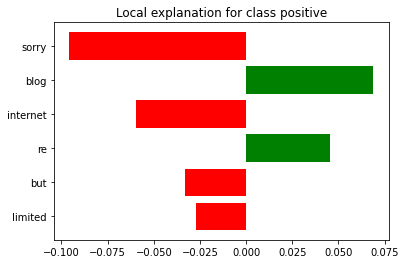

In [77]:
idx=51 # 51, is a good prediction (negative)
       # 52 is a good prediction (positive), 1 is a bad prediction

print('Test document id: %d' % idx)
print('Text: %s',X_test_text[idx])
print('Probability(negative) =', c.predict_proba([X_test_text[idx]])[0,0])
print('Probability(positive) =', c.predict_proba([X_test_text[idx]])[0,1])
print('True class: %s' % class_names[y_test[idx]])
print("Prediction: %s" % class_names[cls.predict(X_test[idx])[0]])
print("-----------------------------------------")
texte = X_test_text[idx]
exp = explainer.explain_instance(texte, c.predict_proba, num_features=6)
fig = exp.as_pyplot_figure()

Type and press enter: Yes of course, for our classroom work, it will be ok, but I know that you are very curious
Text: %s Yes of course, for our classroom work, it will be ok, but I know that you are very curious
Probability(negative) = 0.32688662062726154
Probability(positive) = 0.6731133793727385
-----------------------------------------


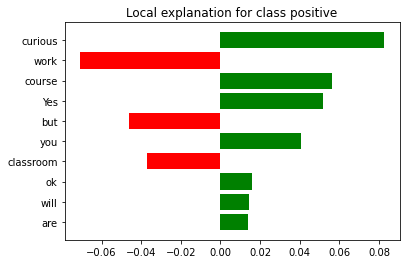

In [81]:
#Test on input text
text_to_analyse = input("Type and press enter: ")
print('Text: %s',text_to_analyse)
print('Probability(negative) =', c.predict_proba([text_to_analyse])[0,0])
print('Probability(positive) =', c.predict_proba([text_to_analyse])[0,1])
print("-----------------------------------------")
exp = explainer.explain_instance(text_to_analyse, c.predict_proba, num_features=10)
fig = exp.as_pyplot_figure()

##Reclassification of near 50% pos or neg to neutral

In [126]:
#For exploration purpose only
pred_proba = cls.predict_proba(X_train)

indice_possible_neutre = np.abs(np.round(pred_proba[:,0]-0.5,2)).astype(float) <= 0.001
print(np.sum(indice_possible_neutre))
possible_neutre = y_train[indice_possible_neutre]
count_neg = len(possible_neutre[possible_neutre==0])
count_pos = len(possible_neutre[possible_neutre==2])
print(possible_neutre)
print(count_neg/len(y_train), count_pos/len(y_train))
y_train_neutral = np.copy(y_train)
y_train_neutral[indice_possible_neutre] = 2

dist_y_train_neutral = [np.sum(y_train_neutral==0)/len(y_train_neutral),
  np.sum(y_train_neutral==2)/len(y_train_neutral)]

print(dist_y_train_neutral)

cls = MultinomialNB(alpha=1,class_prior=dist_y_train_neutral) #Naive Bayes
X_train = vectorizer.transform(X_train_text)
cls.fit(X_train, y_train_neutral)

cls.score(X_test, y_test)

15279
[2 0 0 ... 0 0 0]
0.007028805177882921 0.009289856775144453
[0.49265825759113097, 0.5073417424088691]


0.7811848163563485

##Create Kaggle File for last model

In [42]:
test_input_text = test_inputs[:,1]
X_test_kaggle = vectorizer.transform(test_input_text)

test_pred = cls.predict(X_test_kaggle)

PrepareKaggleFile(test_inputs=test_inputs, test_predictions=test_pred, file='tests_label_xgboost_2.csv')

[[     0      0]
 [     1      2]
 [     2      0]
 ...
 [560172      0]
 [560173      0]
 [560174      2]]


##Random prediction

In [ ]:
# random prediction but aligned with the prior distribution of training labels
p=dist_train_labels
test_pred_alea = np.random.choice(list_classes, len(test_inputs),p=p)

PrepareKaggleFile(test_inputs=test_inputs, test_predictions=test_pred_alea, file='tests_label_alea.csv')